In [3]:
from __future__ import print_function  
import keras
from keras.models import Sequential                
from keras.layers import Dense, Activation         
from keras.optimizers import SGD                    

import pandas                                       
from sklearn.model_selection import train_test_split

/Users/hongxing/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pandas.read_csv("train.csv") 
dataset = dataset.as_matrix() 
X,y = dataset[:,1:], dataset[:,0] 

In [3]:
del(dataset)

In [4]:
y,X[:5]

(array([1, 0, 1, ..., 7, 6, 9]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

the shape of features is: (42000, 784)
the shape of labels is: (42000,)
the range of features is: 0 to 255
the range of labels is: 0 to 9
label 1 is 1
label 2 is 0
label 3 is 1
label 4 is 4
label 5 is 0


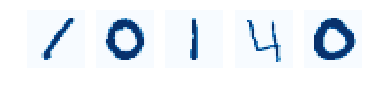

In [5]:
print ('the shape of features is:',X.shape)       #print data shape
print ('the shape of labels is:',y.shape)       #print data shape

import numpy as np
print ('the range of features is:',np.min(X),'to',np.max(X))
print ('the range of labels is:',np.min(y),'to',np.max(y))

import matplotlib.pyplot as plt
% matplotlib inline
for i in range(5):
    image = X[i]
    plt.subplot(1,5, i+1)
    image = image.reshape(28,28)
    print ('label', i+1, 'is',y[i])
    plt.imshow(image, cmap='Blues')
    plt.axis('off')

In [6]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20) # Split data

x_train = x_train/255.0                           # normalize training data
x_val = x_val/255.0                             # normalize testing data

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

In [7]:
# set parameters
batch_size = 256
epochs = 300
learning_rate = 0.0001

# build the model
model = Sequential()                                         # define model to be sequential
model.add(Dense(256, activation='relu',input_dim=784))       # first hidden layer with 256 neurons
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='relu'))                     # second hidden layer with 256 neurons
model.add(Dense(10, activation='softmax'))                   # output layer
model.summary()                                              # print out summary for all layers 


my_optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)                   # using learning rate 0.001
model.compile(optimizer=my_optimizer,                        # using SGD with our set lr as optimizer
              loss='categorical_crossentropy',               # using cross entropy loss
              metrics=['accuracy'])                          # metric that is called during evaluation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total para

In [8]:
best_weights_filepath = './best_weights.hdf5' ##define the filename to store
                                            ##the best performance and weights
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                                              patience = 5) 
#Stop training early if val_acc doesn't improve for 5 epochs

SaveBestWeights = keras.callbacks.ModelCheckpoint(best_weights_filepath,
                                                  monitor='val_acc',
                                                  save_best_only=True)
# store the historically best performing weights in best_weights_filepath
#, where performance is given by accuracy on the validation set.


model_history = model.fit(x_train, y_train,                   # training data 
                    batch_size=batch_size,                   # batch size 256
                    epochs=epochs,                           # 15 epochs 
                    verbose= 2,                              # verbose level
                    validation_data = (x_val, y_val),  #Use the previously defined x_test as a validation set. 
                    callbacks = [earlyStopping, SaveBestWeights]
                         )     
model.load_weights(best_weights_filepath) ##Set the best performing weights to the model

Train on 33600 samples, validate on 8400 samples
Epoch 1/300
 - 2s - loss: 2.2987 - acc: 0.1398 - val_loss: 2.2605 - val_acc: 0.1902
Epoch 2/300
 - 1s - loss: 1.9337 - acc: 0.3945 - val_loss: 1.4797 - val_acc: 0.4975
Epoch 3/300
 - 1s - loss: 1.1836 - acc: 0.6198 - val_loss: 0.9535 - val_acc: 0.7221
Epoch 4/300
 - 1s - loss: 0.8061 - acc: 0.7644 - val_loss: 0.7088 - val_acc: 0.7990
Epoch 5/300
 - 1s - loss: 0.6217 - acc: 0.8271 - val_loss: 0.5720 - val_acc: 0.8402
Epoch 6/300
 - 1s - loss: 0.5090 - acc: 0.8627 - val_loss: 0.4841 - val_acc: 0.8677
Epoch 7/300
 - 1s - loss: 0.4390 - acc: 0.8815 - val_loss: 0.4353 - val_acc: 0.8773
Epoch 8/300
 - 1s - loss: 0.3898 - acc: 0.8942 - val_loss: 0.3933 - val_acc: 0.8879
Epoch 9/300
 - 1s - loss: 0.3576 - acc: 0.9024 - val_loss: 0.3697 - val_acc: 0.8944
Epoch 10/300
 - 1s - loss: 0.3302 - acc: 0.9099 - val_loss: 0.3499 - val_acc: 0.9017
Epoch 11/300
 - 1s - loss: 0.3090 - acc: 0.9146 - val_loss: 0.3260 - val_acc: 0.9073
Epoch 12/300
 - 1s - loss

In [9]:
testset = pandas.read_csv("test.csv")             # Read data
testset = testset.as_matrix()                     # Convert to ndarray
testset = testset/255.0                             # normalize testing data
predictions = model.predict_classes(testset)           # Predict

In [10]:
submission = pandas.DataFrame(data=predictions, index=np.arange(1,len(predictions)+1), columns=['Label']) # Create dataframe
submission.index.name = 'ImageId' # Set index name

csv_text = submission.to_csv() # Convert to text

# Write to file 'submission.csv'
with open("submission.csv",'w') as csv_file:
    csv_file.write(csv_text)

In [5]:
submission=pandas.read_csv('submission.csv')
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
